# This code demonstrates a Hidden markov modeling of conformational transitions from AFM images

# load required packages

In [1]:
using Statistics, Plots, DelimitedFiles
using Revise; using MDToolbox

┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise /Users/yasu/.julia/packages/Revise/BqeJF/src/Revise.jl:1328
┌ Info: Precompiling MDToolbox [7965e2f0-a35b-11e8-0207-19c030dd2def]
└ @ Base loading.jl:1260


In [2]:
using BSON: @save, @load
@load "data/t1r/t1r.bson" C T pi_i p_all indexOfCluster tau pdb psf

In [3]:
nstate = size(T, 1)

50

# generate AFM data

In [16]:
nframe = 100
state = msmgenerate(100, T, pi_i)
state[1] = 3
state[2] = 5

5

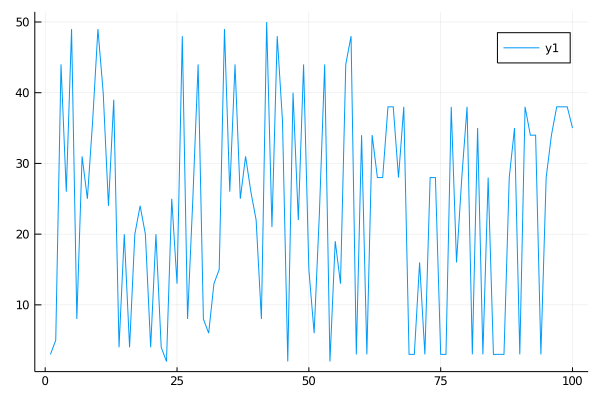

In [18]:
plot(state)

# calculate emissions

In [19]:
# quaternion
qs = readdlm("data/quaternion/QUATERNION_LIST_576_Orient");

In [20]:
# model
models = pdb
for iatom = 1:models.natom
    models.atomname[iatom] = models.resname[iatom]
end
decenter!(models)
models = superimpose(models[1, :], models);

In [21]:
# afm
probe_radius = 20.0
afmize_config = AfmizeConfig(10.0 * (pi / 180),
    probe_radius, 
    MDToolbox.Point2D(-250, -200), 
    MDToolbox.Point2D(250, 200), 
    MDToolbox.Point2D(6.25, 6.25), 
    MDToolbox.defaultParameters())

sigma_noise = 3.0

afms = []
for iframe in 1:nframe
    model = models[state[iframe], :]
    afm = afmize(model, afmize_config)
    h, w = size(afm)
    afm .+= randn(h, w) * sigma_noise
    push!(afms, afm)
end
@save "msm_hmm_afm.bson" afms models state qs afmize_config probe_radius sigma_noise

┌ Info: Saved animation to 
│   fn = /Users/yasu/gdrive/MDToolbox.jl/notebook/msm_hmm_afm.gif
└ @ Plots /Users/yasu/.julia/packages/Plots/ninUP/src/animation.jl:104


Plots.AnimatedGif("/Users/yasu/gdrive/MDToolbox.jl/notebook/msm_hmm_afm.gif")
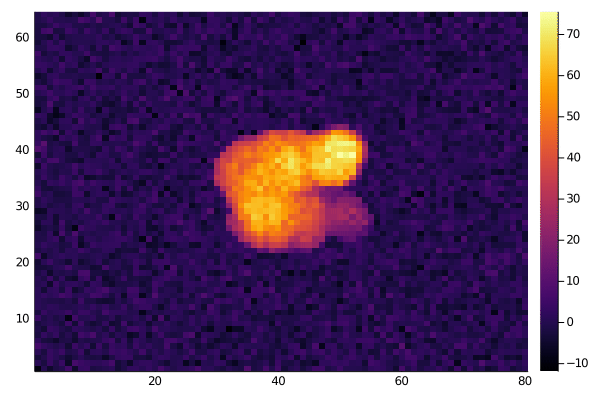

In [22]:
anim = @animate for i = 1:length(afms)
    heatmap(afms[i])
end
gif(anim, "msm_hmm_afm.gif", fps = 10)

In [23]:
configs = [AfmizeConfig(10.0 * (pi / 180),
    r, 
    MDToolbox.Point2D(-250, -200), 
    MDToolbox.Point2D(250, 200), 
    MDToolbox.Point2D(6.25, 6.25), 
    MDToolbox.defaultParameters())
    for r in [10.0, 15.0, 20.0, 25.0, 30.0]]

5-element Array{AfmizeConfig,1}:
 AfmizeConfig(0.17453292519943295, 10.0, MDToolbox.Point2D{Int64}(-250, -200), MDToolbox.Point2D{Int64}(250, 200), MDToolbox.Point2D{Float64}(6.25, 6.25), Dict("SI" => 2.1,"GLN" => 3.0,"GLU" => 2.95,"C" => 1.7,"MG" => 1.73,"P" => 1.8,"LYS" => 3.2,"GLY" => 2.25,"ASN" => 2.85,"NE" => 1.54…))
 AfmizeConfig(0.17453292519943295, 15.0, MDToolbox.Point2D{Int64}(-250, -200), MDToolbox.Point2D{Int64}(250, 200), MDToolbox.Point2D{Float64}(6.25, 6.25), Dict("SI" => 2.1,"GLN" => 3.0,"GLU" => 2.95,"C" => 1.7,"MG" => 1.73,"P" => 1.8,"LYS" => 3.2,"GLY" => 2.25,"ASN" => 2.85,"NE" => 1.54…))
 AfmizeConfig(0.17453292519943295, 20.0, MDToolbox.Point2D{Int64}(-250, -200), MDToolbox.Point2D{Int64}(250, 200), MDToolbox.Point2D{Float64}(6.25, 6.25), Dict("SI" => 2.1,"GLN" => 3.0,"GLU" => 2.95,"C" => 1.7,"MG" => 1.73,"P" => 1.8,"LYS" => 3.2,"GLY" => 2.25,"ASN" => 2.85,"NE" => 1.54…))
 AfmizeConfig(0.17453292519943295, 25.0, MDToolbox.Point2D{Int64}(-250, -200), MDToolbox.Point

In [24]:
res = []
for i = 1:nframe
    @show i
    res2 = getafmposterior(afms[i], models, qs, configs)
    push!(res, res2)
end
# @load "msm_hmm_afm.posterior.bson" res

i = 1
size(model_array, 1) = 5
imodel = 3
imodel = 4
imodel = 5
imodel = 1
imodel = 2
i = 2
size(model_array, 1) = 5
imodel = 3
imodel = 4
imodel = 5
imodel = 1
imodel = 2


In [ ]:
emission = zeros(Float64, nstate, nframe)

for i = 1:nframe
    emission[:, i] .= res[i][end]
end

In [ ]:
observation = collect(1:nframe)

# Hidden markov modeling

In [32]:
# initial transition probabilities
T0 = rand(Float64, nstate, nstate)
T0 .= T0 ./ sum(T0, dims=2)
pi_i = T0[1, :]

50-element Array{Float64,1}:
 0.03660379644749181
 0.011693958485212697
 0.023086134937501078
 0.022511380927388292
 0.005780134385693139
 0.007675700311845795
 0.0017567185850315198
 0.03621569676881288
 0.02141579809642652
 0.030794214580108715
 0.019771097491813362
 0.027215711493563857
 0.026448449699960314
 ⋮
 0.02347899053807291
 0.0196826775125554
 0.03030560852021155
 0.0351572873981991
 0.02195194619923431
 0.013674488949401317
 0.009148346488910388
 0.03611975557493067
 0.0006479999910575553
 0.008766156149279029
 0.022484795082774598
 0.01324667356332364

In [ ]:
@time T1, pi_i1, emission1 = msmbaumwelch([observation], T0, pi_i, emission);

# visualization

In [9]:
heatmap(T)

3×3 Array{Float64,2}:
 0.00760309  0.0256934  0.966703
 0.378569    0.394872   0.226559
 0.127024    0.866211   0.00676495

In [ ]:
heatmap(T0)

In [ ]:
heatmap(T1)

# Viterbi algorithm

In [ ]:
@time state_estimated = msmviterbi(observation, T1, pi_i1, emission1);

In [ ]:
pyplot()
plot(state, line=(2), label="ground-truth")
plot!(state_estimated, line=(2), label="estimated", legend=:topright)